# Tugas 1 

# Pengertian Data Understanding 

Data Understanding adalah tahap awal dalam proses analisis data yang bertujuan untuk memahami karakteristik, struktur, dan kualitas data sebelum dilakukan pemrosesan lebih lanjut. Tahap ini penting untuk memastikan bahwa data yang digunakan sudah sesuai, relevan, dan memiliki kualitas yang baik untuk dianalisis atau digunakan dalam pembuatan model.

# Langkah - langkah Dalam Data Understanding

# Pengumpulan Data
Mengumpulkan data dari berbagai sumber, seperti database, file CSV, API, atau sensor. Memastikan bahwa semua data yang relevan telah dikumpulkan sesuasi tujuan analisis. Dalam tahap ini saya  mengumpulkan data dan meletakkan di aiven.io yang merupakan sumber data dari data base yang berbeda dalam tahapan pengumpulan data, harus dipastikan bahwa semua data harus relevan sesuai dengan tujuan analisis.

In [8]:
pip install psycopg2-binary

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.6 MB 1.9 MB/s eta 0:00:02
   ------------ --------------------------- 0.8/2.6 MB 1.5 MB/s eta 0:00:02
   -------------------- ------------------- 1.3/2.6 MB 1.7 MB/s eta 0:00:01
   ------------------------ --------------- 1.6/2.6 MB 1.6 MB/s eta 0:00:01
   ---------------------------- ----------- 1.8/2.6 MB 1.5 MB/s eta 0:00:01
   -------------------------------- ------- 2.1/2.6 MB 1.4 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Koneksi ke Database Mysql dan PosgreSQL melalui dari aiven.io


Koneksi ke PosgreSQL dan menampilkan datanya

In [4]:
import psycopg2
import pandas as pd
from tabulate import tabulate

# Koneksi ke database PostgreSQL
PG_HOST = "posgesqlpendata23-175-posgresqlpendata23-175.h.aivencloud.com"
PG_PORT = "17047"
PG_NAME = "defaultdb"
PG_USER = "avnadmin"
PG_PASS = "AVNS_XfGwRG6_6e5BdqZXovg"

try:
    # Membuat koneksi
    conn = psycopg2.connect(
        host=PG_HOST,
        port=PG_PORT,
        dbname=PG_NAME,
        user=PG_USER,
        password=PG_PASS,
        sslmode="require"
    )
    cur = conn.cursor()

    # Menjalankan query
    cur.execute("SELECT * FROM irisposgre.posgre;")  # Ganti dengan nama skema & tabel yang benar
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()


+-----+------+-----------------+----------------+---------------+
|     |   id | Class           |   sepal length |   sepal width |
|-----+------+-----------------+----------------+---------------|
|   0 |    1 | Iris-setosa     |            5.1 |           3.5 |
|   1 |    2 | Iris-setosa     |            4.9 |           3   |
|   2 |    3 | Iris-setosa     |            4.7 |           3.2 |
|   3 |    4 | Iris-setosa     |            4.6 |           3.1 |
|   4 |    5 | Iris-setosa     |            5   |           3.6 |
|   5 |    6 | Iris-setosa     |            5.4 |           3.9 |
|   6 |    7 | Iris-setosa     |            4.6 |           3.4 |
|   7 |    8 | Iris-setosa     |            5   |           3.4 |
|   8 |    9 | Iris-setosa     |            4.4 |           2.9 |
|   9 |   10 | Iris-setosa     |            4.9 |           3.1 |
|  10 |   11 | Iris-setosa     |            5.4 |           3.7 |
|  11 |   12 | Iris-setosa     |            4.8 |           3.4 |
|  12 |   

# Koneksi ke MySQL dan menampilkan datanya

In [5]:
import pymysql
import pandas as pd
from tabulate import tabulate

# Konfigurasi koneksi ke database MySQL
DB_HOST = "mysql-pendata23-175-mysqlpendata23-175.g.aivencloud.com"
DB_PORT = 17974
DB_NAME = "defaultdb"
DB_USER = "avnadmin"
DB_PASS = "AVNS_756YWhIqpe1WzSKsGNx"

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=DB_HOST,
        port=DB_PORT,
        user=DB_USER,
        password=DB_PASS,
        database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor  # Mengembalikan hasil sebagai dictionary
    )
    cur = conn.cursor()

    # Menjalankan query SQL
    query = "SELECT * FROM irismysql.flowers;"  # Sesuaikan dengan nama tabel
    cur.execute(query)
    rows = cur.fetchall()

    # Jika tabel kosong
    if not rows:
        print("Tabel kosong, tidak ada data untuk ditampilkan.")
    else:
        # Mengubah hasil query menjadi DataFrame pandas
        df = pd.DataFrame(rows)

        # Menampilkan 3 data awal, titik-titik di tengah, dan 3 data akhir
        df_selected = pd.concat([df.head(3), pd.DataFrame([["..."] * len(df.columns)], columns=df.columns), df.tail(3)])

        # Menampilkan tabel dengan format psql
        print(tabulate(df_selected, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi ke database
    if cur:
        cur.close()
    if conn:
        conn.close()


+------+----------------+----------------+---------------+
| id   | class          | petal length   | petal width   |
|------+----------------+----------------+---------------|
| 1    | Iris-setosa    | 1.4            | 0.2           |
| 2    | Iris-setosa    | 1.4            | 0.2           |
| 3    | Iris-setosa    | 1.3            | 0.2           |
| ...  | ...            | ...            | ...           |
| 148  | Iris-virginica | 5.2            | 2.0           |
| 149  | Iris-virginica | 5.4            | 2.3           |
| 150  | Iris-virginica | 5.1            | 1.8           |
+------+----------------+----------------+---------------+


# Sampling data


Sampling data digunakan untuk memahami subset data tanpa harus memproses seluruh dataset disi.pada tahap ini samplng digunakan dengan mengelompokkan data berdasarkan kelasnya dengan warna yang berbeda yaitu Iris-sentosa berwarna biru Iris-versicolor berwarna merah dan Iris-virginica berwarna hijau hal ini salahsatunya bertujuan untuk memudahkan visuakisasi

# Profiling data


merupakan proses membuat ringkasan tentang setiap variable dalam dataset,termasuk tipe data dan meproses memeriksa, memahami, dan menganalisis struktur serta kualitas data sebelum digunakan dalam analisis lebih lanjut.

menarik data base dari PosgreSql dan Mysql menjadi 1 tabel sekaligus mengecek apakah terdapat mising value dan ketidak konsistenan ketika data digabungkan

In [6]:
import psycopg2
import pymysql
import pandas as pd
from tabulate import tabulate

# Koneksi PostgreSQL
PG_HOST = "posgesqlpendata23-175-posgresqlpendata23-175.h.aivencloud.com"
PG_PORT = "17047"
PG_NAME = "defaultdb"
PG_USER = "avnadmin"
PG_PASS = "AVNS_XfGwRG6_6e5BdqZXovg"

# Koneksi MySQL
DB_HOST = "mysql-pendata23-175-mysqlpendata23-175.g.aivencloud.com"
DB_PORT = 17974
DB_NAME = "defaultdb"
DB_USER = "avnadmin"
DB_PASS = "AVNS_756YWhIqpe1WzSKsGNx"

try:
    # Koneksi PostgreSQL
    conn = psycopg2.connect(
        host=PG_HOST, port=PG_PORT, dbname=PG_NAME,
        user=PG_USER, password=PG_PASS, sslmode="require"
    )
    cur = conn.cursor()

    # Ambil data dari PostgreSQL (ID, Class, Sepal Length, Sepal Width)
    cur.execute("SELECT * FROM irisposgre.posgre;")  # Sesuaikan tabel
    pg_rows = cur.fetchall()
    pg_columns = [desc[0] for desc in cur.description]
    pg_df = pd.DataFrame(pg_rows, columns=pg_columns)

    # Koneksi MySQL
    mysql_conn = pymysql.connect(
        host=DB_HOST, port=DB_PORT, user=DB_USER,
        password=DB_PASS, database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor
    )
    mysql_cur = mysql_conn.cursor()

    # Ambil data dari MySQL (ID, Petal Length, Petal Width)
    mysql_cur.execute("SELECT * FROM irismysql.flowers;")  # Sesuaikan tabel
    mysql_rows = mysql_cur.fetchall()
    mysql_df = pd.DataFrame(mysql_rows)

    # Menggabungkan kedua tabel berdasarkan ID
    combined_df = pd.merge(pg_df, mysql_df, on="id", how="inner")  # Inner join

    # Mengatur urutan kolom agar class berada di sebelah ID
    ordered_columns = ["id", "class", "sepal length", "sepal width", "petal length", "petal width"]
    combined_df = combined_df[ordered_columns]

    # Menampilkan 3 data awal, tanda "..." di tengah, dan 3 data akhir
    df_selected = pd.concat([
        combined_df.head(3),
        pd.DataFrame([["..."] * len(combined_df.columns)], columns=combined_df.columns),
        combined_df.tail(3)
    ])

    # Menampilkan hasil dalam format tabel
    print(tabulate(df_selected, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi database
    if cur:
        cur.close()
    if conn:
        conn.close()
    if mysql_cur:
        mysql_cur.close()
    if mysql_conn:
        mysql_conn.close()


+------+----------------+----------------+---------------+----------------+---------------+
| id   | class          | sepal length   | sepal width   | petal length   | petal width   |
|------+----------------+----------------+---------------+----------------+---------------|
| 1    | Iris-setosa    | 5.1            | 3.5           | 1.4            | 0.2           |
| 2    | Iris-setosa    | 4.9            | 3.0           | 1.4            | 0.2           |
| 3    | Iris-setosa    | 4.7            | 3.2           | 1.3            | 0.2           |
| ...  | ...            | ...            | ...           | ...            | ...           |
| 148  | Iris-virginica | 6.5            | 3.0           | 5.2            | 2.0           |
| 149  | Iris-virginica | 6.2            | 3.4           | 5.4            | 2.3           |
| 150  | Iris-virginica | 5.9            | 3.0           | 5.1            | 1.8           |
+------+----------------+----------------+---------------+----------------+-----

# Visualisasi Data 


Visualisasi data dalam analisis dataset digunakan ketika kita ingin memahami, mengeksplorasi, dan menyajikan pola dalam data. visualisasi membantu dalam mendeteksi pola, tren, hubungan antar fitur, serta distribusi data menampilkan visualisasi data dengan diagram membantu dalam mempercepat analisis data.

# Korelasi dan Asosiasi


Korelasi dan asosiasi merupakan proses menghitung koefisien korelasi untuk melihat hubungan linier antar variable yang bertujuan untuk menganalisis hubungan antar variabel dalam dataset.

# Eksplorasi Data


Eksplorasi data adalah proses awal dalam analisis data untuk memahami karakteristik, distribusi, dan pola dalam dataset sehingga menghasilkan deskripsi statistik seperti mean, median, modus,standar deviasi,minimun, dan maskimum dengan menggunakan visualisasi data seperti grafik histogram scatter plot untuk melihat pola atau trend awal.

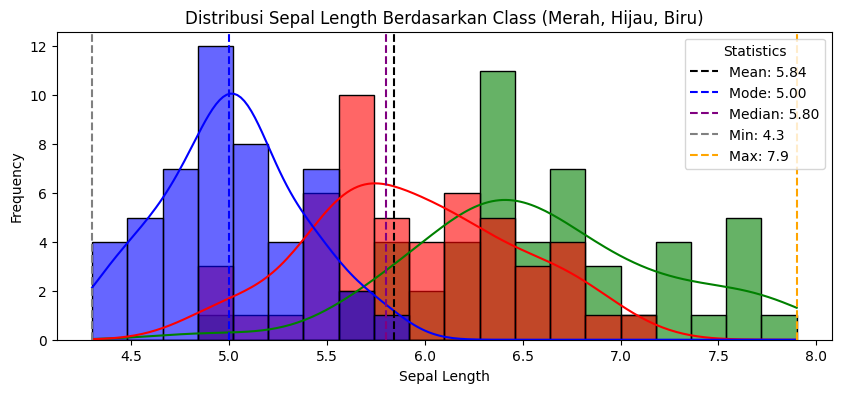

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom benar
sepal_length_col = "sepal length"  # Sesuaikan dengan nama kolom yang benar
class_col = "class"  # Sesuaikan dengan nama kolom yang benar

# Tetapkan warna khusus untuk setiap class
custom_palette = {
    "Iris-setosa": "blue",
    "Iris-versicolor": "red",
    "Iris-virginica": "green"
}

# Hitung statistik dasar
mean_sepal_length = combined_df[sepal_length_col].mean()
median_sepal_length = combined_df[sepal_length_col].median()
min_sepal_length = combined_df[sepal_length_col].min()
max_sepal_length = combined_df[sepal_length_col].max()
mode_sepal_length = combined_df[sepal_length_col].mode()[0]


# Buat plot distribusi dengan warna yang sudah ditentukan
plt.figure(figsize=(10, 4))
sns.histplot(data=combined_df, x=sepal_length_col, hue=class_col, bins=20, kde=True, alpha=0.6, palette=custom_palette)

# Tambahkan garis rata-rata, median, min, dan max
plt.axvline(mean_sepal_length, color="black", linestyle="--", label=f"Mean: {mean_sepal_length:.2f}")
plt.axvline(mode_sepal_length, color="blue", linestyle="--", label=f"Mode: {mode_sepal_length:.2f}")
plt.axvline(median_sepal_length, color="purple", linestyle="--", label=f"Median: {median_sepal_length:.2f}")
plt.axvline(min_sepal_length, color="gray", linestyle="--", label=f"Min: {min_sepal_length:.1f}")
plt.axvline(max_sepal_length, color="orange", linestyle="--", label=f"Max: {max_sepal_length:.1f}")

# Tambahkan label
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.title("Distribusi Sepal Length Berdasarkan Class (Merah, Hijau, Biru)")
plt.legend(title="Statistics")

# Tampilkan plot
plt.show()



🔹 Statistik Deskriptif
               id  petal length  petal width  sepal length  sepal width
count  150.000000    150.000000   150.000000    150.000000   150.000000
mean    75.500000      3.758667     1.198667      5.843333     3.054000
std     43.445368      1.764420     0.763161      0.828066     0.433594
min      1.000000      1.000000     0.100000      4.300000     2.000000
25%     38.250000      1.600000     0.300000      5.100000     2.800000
50%     75.500000      4.350000     1.300000      5.800000     3.000000
75%    112.750000      5.100000     1.800000      6.400000     3.300000
max    150.000000      6.900000     2.500000      7.900000     4.400000

🔹 Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   Class         150 non-null    object 
 2   petal length  150 non-null

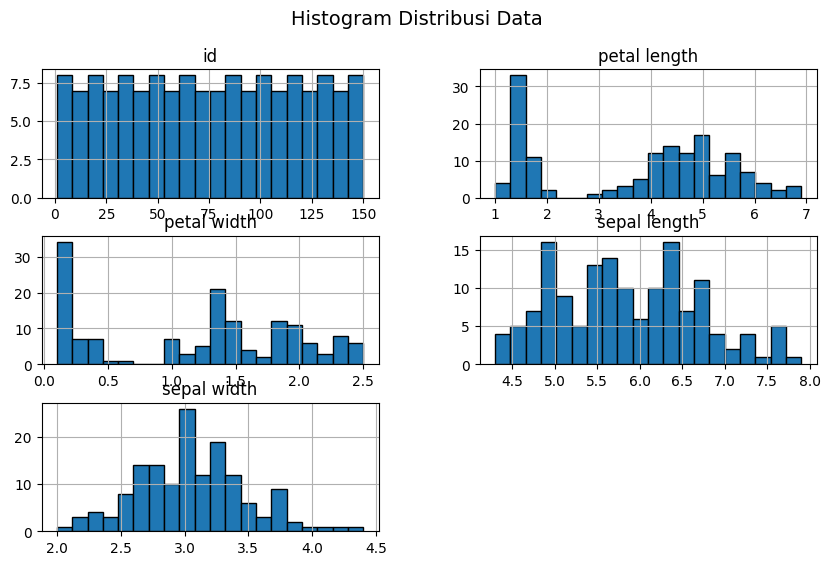

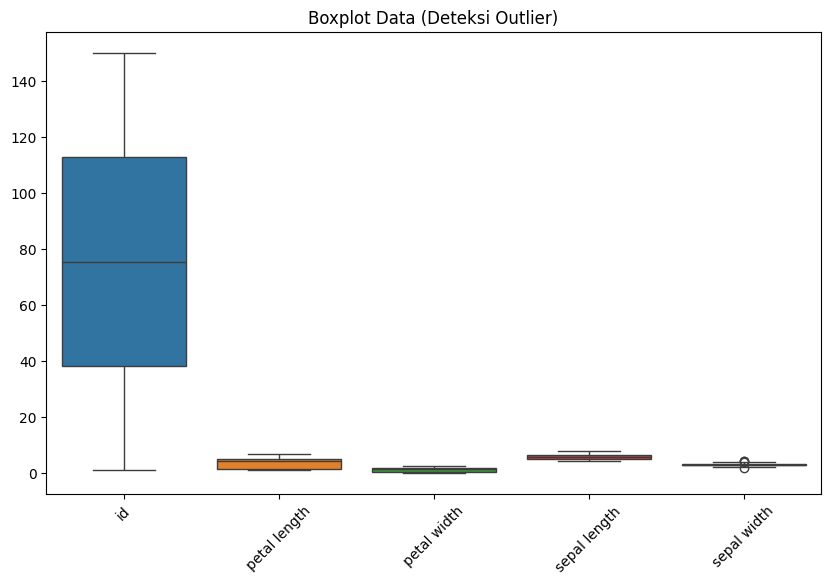

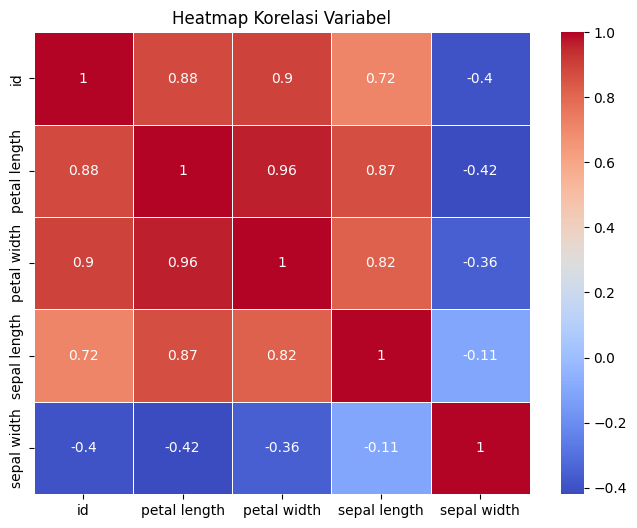

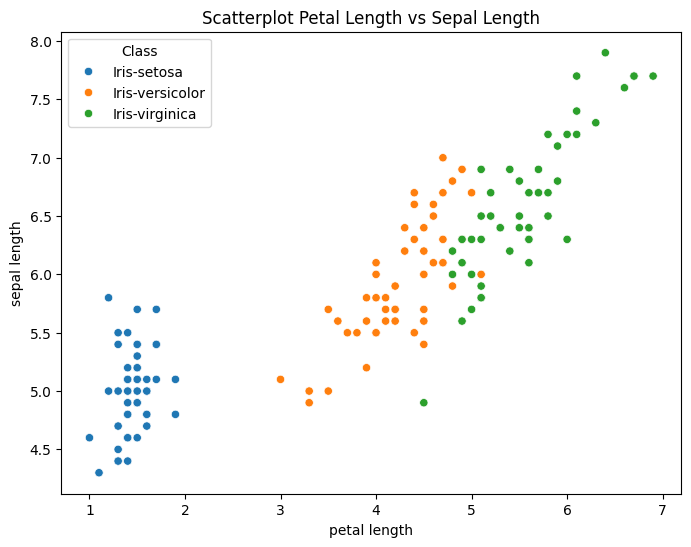

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data hasil penggabungan
df = pd.read_csv("merged_data.csv")

# Statistik Deskriptif
print("\n🔹 Statistik Deskriptif")
print(df.describe())  # Statistik numerik

print("\n🔹 Informasi Dataset")
df.info()  # Cek tipe data & missing values

print("\n🔹 Cek Missing Values")
print(df.isnull().sum())  # Jumlah nilai yang hilang di setiap kolom

# Visualisasi Data

# Histogram untuk melihat distribusi
df.hist(figsize=(10, 6), bins=20, edgecolor="black")
plt.suptitle("Histogram Distribusi Data", fontsize=14)
plt.show()

# Boxplot untuk melihat outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))  # Hanya numerik
plt.title("Boxplot Data (Deteksi Outlier)")
plt.xticks(rotation=45)
plt.show()

# Heatmap Korelasi Antar Variabel (Hanya Kolom Numerik)
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Variabel")
plt.show()

# Scatterplot (hubungan antara petal length & sepal length)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="petal length", y="sepal length", hue="Class", data=df)
plt.title("Scatterplot Petal Length vs Sepal Length")
plt.show()

# Indentifikasi Masalah Data


merupakan proses memahami kualitas data dan memastikan bahwa data yang akan kita analisis atau gunakan dalam model machine learning sudah bersih, lengkap, dan sesuai format yang diharapkan. Hal yang perlu diperhatikan adalah:


Missing Values: Menemukan data yang hilang atau tidak lengkap.
Outliers: Mendeteksi nilai-nilai ekstrem yang mungkin merupakan kesalahan atau anomali.
Duplikasi Data: Mengidentifikasi baris atau entri yang duplikat.
Inkonsistensi: Memeriksa apakah ada ketidaksesuaian dalam format atau nilai data.

# Validasi data

Validasi data dilakukan untuk memastikan bahwa data yang digunakan bersih, lengkap, dan sesuai sebelum dianalisis atau divisualisasikan dan memastikan apakah data memcerminkan realitas atau fenomena yang ingin dipelajari. 